# iGraph Library

In [1]:
import igraph as ig

In [2]:
ig.__version__

'0.8.0-pre+7533e57'

## Graph Creation

In [3]:
g = ig.Graph()

In [4]:
g

In [5]:
print(g)

IGRAPH U--- 0 0 --


## Adding Vertices

In [6]:
g.add_vertices(3)

In [7]:
print(g)

IGRAPH U--- 3 0 --


### Accessing Vertices

In [8]:
g.vs

In [9]:
for i in g.vs:
    print(i)

igraph.Vertex(<igraph.Graph object at 0x10c122c78>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x10c122c78>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x10c122c78>, 2, {})


In [10]:
g.es

In [11]:
g.es.attributes()

[]

In [12]:
g.vs.attributes()

[]

### Vertex Indices

In [13]:
g.vs.indices

[0, 1, 2]

In [14]:
for i in range(len(g.vs.indices)):
    print(g.vs.indices[i])

0
1
2


In [15]:
g.add_vertices(7)

In [16]:
g.vs.indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
vcount = len(g.vs.indices)
print("Number of vertices: ", vcount)

Number of vertices:  10


## Adding Edges

In [18]:
for i in range(vcount):
    g.add_edge(i,(i+1)%vcount)
    print("Edge added between vertex ",i," and vertex ",(i+1)%vcount)

Edge added between vertex  0  and vertex  1
Edge added between vertex  1  and vertex  2
Edge added between vertex  2  and vertex  3
Edge added between vertex  3  and vertex  4
Edge added between vertex  4  and vertex  5
Edge added between vertex  5  and vertex  6
Edge added between vertex  6  and vertex  7
Edge added between vertex  7  and vertex  8
Edge added between vertex  8  and vertex  9
Edge added between vertex  9  and vertex  0


### Edge Indices

In [19]:
g.es.indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Selecting Edges

In [20]:
seq = g.vs.select(5,6)
print(seq.indices)

[5, 6]


In [21]:
try:
    g.vs.select(5,21)
except ValueError:
    print("Indices out of bounds")

Indices out of bounds


**Note**: `ig.add_edge(a,b)` adds an edge between vertices indexed by `a` and `b`. However, the `add_edge` function does not check whether `a` and `b` are already connected by an edge. Thus one repeat `ig.add_edge(a,b)` indefinitely to add as many edges as we like between the same pair of nodes.

Thus, we will need to overload the method `add_edge(a,b)` to check for whether or not the two vertices are already connected.

### Overloading `Graph.add_edges`

In [22]:
class dvGraph(ig.Graph):
    def __init__(self):
        ig.Graph.__init__(self)
        # By default allow unlimited number of edges between any two vertices.
        self.max_edges_between_nodes = -1
    
    def set_max_edges_between_nodes(self,n):
        if n>=-1 and type(n)==int:
            self.max_edges_between_nodes = n
        else:
            raise ValueError()
    
    def add_edge(self,a,b):
        # check to make sure vertices a,b exist:
        try:
            seq = self.vs.select(a,b)
        except ValueError:
            print("Indices out of bounds")
            return None
        ig.Graph.add_edge(self,a,b)
        

In [23]:
dg = dvGraph()

In [24]:
dg.add_vertices(6)

In [25]:
dg.add_edge(4,5)

In [26]:
dg.add_edge(4,7)

Indices out of bounds


In [27]:
dg.es.indices

[0]

In [28]:
dg.es[0]

igraph.Edge(<__main__.dvGraph object at 0x10c122d68>, 0, {})

In [29]:
dg.get_edgelist()

[(4, 5)]

In [30]:
for i in range(5):
    dg.add_edge(4,5)

### Multiply Connected Nodes

In [31]:
dg.get_edgelist()

[(4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]

In [32]:
dg.add_edge(5,4)

In [33]:
dg.get_edgelist()

[(4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]

## Directed Graphs

The methods `Graph.to_directed()` and `Graph.to_undirected()` change the Graph object calling the method. Therefore, if we want to avoid modifying a graph "in place", we must first make a copy of the graph before calling either one of these functions.

In [34]:
dg.to_directed()

`Graph.to_directed()` takes one argument `mutual` whose default value is `True`. Meaning that the graph is converted to a directed graph by creating an edge directed opposite to every existing edge.

In [35]:
dg.get_edgelist()

[(4, 5),
 (4, 5),
 (4, 5),
 (4, 5),
 (4, 5),
 (4, 5),
 (4, 5),
 (5, 4),
 (5, 4),
 (5, 4),
 (5, 4),
 (5, 4),
 (5, 4),
 (5, 4)]

## Undirected Graphs

In [36]:
dg.to_undirected()

`Graph.to_undirected()` takes two default arguments `mode="collapse"` and `combine_edges=None`. `mode` takes three possible values:
* `True` or  `collapse`: multiple directed edges between any two nodes are replaced by a single undirected edge
* `False` or `each`: multiple directed edges between any two nodes are replaced by the same number of undirected edges between the two nodes.
* `mutual`: Each pair of mutual directed edges between any two nodes is replaced by a single undirected edge. And the remaining unpaired directed edges are replaced by an equal number of undirected edges.

In [37]:
dg.get_edgelist()

[(4, 5)]

In [38]:
dg.summary()

'IGRAPH U--- 6 1 -- '

## Adjacency Matrix

In [39]:
dg.get_adjacency()

Matrix([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]])

## Plotting

In [80]:
layout = dg.layout_random()

In [81]:
plot = ig.plot(dg,layout = layout, bbox=(200,200),vertexsize=20)

In [86]:
dg.vs.degree()

[0, 0, 0, 0, 1, 1]

In [88]:
vertex0 = dg.vs[0]

In [90]:
ig.Graph.__plot__?

### Vertex and Edge Sizes, Colors, Etc

For plotting purposes, vertices and edges can be assigned certain attributes, such that when the graph is plotted, those attributes are used as parameters for displaying the plot.

In the following example, the `"size"` attribute of each vertex is assigned the value `vs[i].degree()*5 + 1`. This will result in a plot where all vertices with no edges will have size 1 and the rest will have a size equal to their degree multiplied by 5.

In [118]:
for i in dg.vs.indices:
    dg.vs[i]["size"] = (dg.vs[i].degree()*5+1)

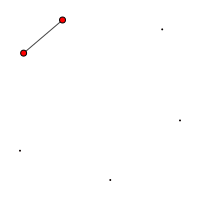

In [119]:
ig.plot(dg,bbox=(200,200))

### Accessing Attributes

The attributes of the edges and vertices can be accessed by using the function `attributes()` which is bound to the `vs` and `es` elements of each graph.

In [114]:
dg.vs.attributes()

['size']

In [120]:
dg.es.attributes()

[]

In [121]:
dg.vs.attribute_names()

['size']